In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('classifications.csv')
df

,EUBWID,label,year,classificationLabel
0,ukc1101-06000,Seaton Carew North,2021,Good
1,ukc1101-06000,Seaton Carew North,2022,Good
2,ukc1101-06100,Seaton Carew Centre,2021,Excellent
3,ukc1101-06100,Seaton Carew Centre,2022,Excellent
4,ukc1101-06200,Seaton Carew North Gare,2021,Excellent
...,...,...,...,...
835,ukk4306-23000,Ness Cove,2022,Excellent
836,ukk4307-33800,Hartland Quay,2021,Excellent
837,ukk4307-33800,Hartland Quay,2022,Excellent
838,ukk4307-33900,Westward Ho!,2021,Excellent


In [3]:
 df['classificationLabel'].value_counts()

Excellent     597
Good          187
Sufficient     36
Poor           16
Closed          4
Name: classificationLabel, dtype: int64

In [4]:
closed_Label = df[df['classificationLabel'] == 'Closed']
closed_Label

,EUBWID,label,year,classificationLabel
142,uke1200-08800,Tunstall,2021,Closed
143,uke1200-08800,Tunstall,2022,Closed
726,ukk4200-23200,Watcombe,2021,Closed
727,ukk4200-23200,Watcombe,2022,Closed


In [5]:
df['classificationLabel'] = df['classificationLabel'].map({'Excellent': 3, 'Good': 2, 'Sufficient': 1, 'Poor': 0})
mean_label = df.groupby('label')['classificationLabel'].mean().sort_values(ascending = False)
mean_label

label
Yaverland                      3.0
Lusty Glaze                    3.0
Highcliffe                     3.0
Hive                           3.0
Holland                        3.0
                              ... 
Heacham                        0.0
Wharfe at Cromwheel, Ilkley    0.0
Wolvercote Mill Stream         0.0
Tunstall                       NaN
Watcombe                       NaN
Name: classificationLabel, Length: 421, dtype: float64

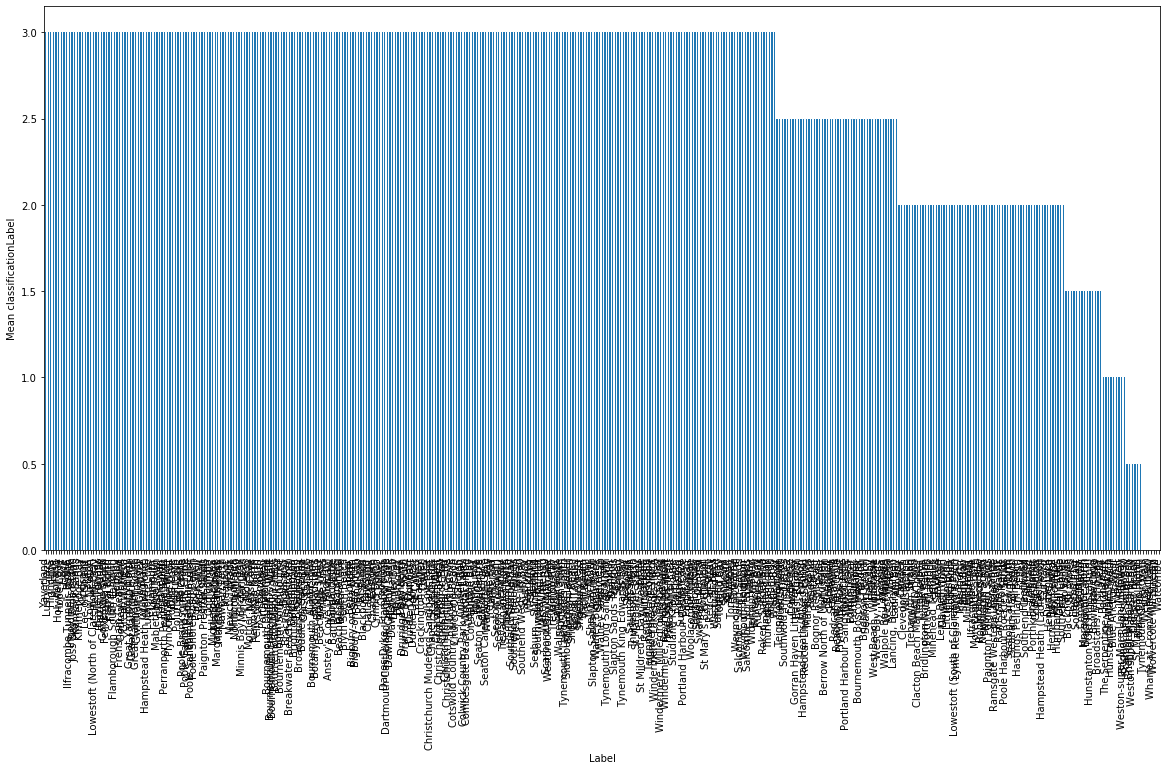

In [6]:
mean_label.plot(kind='bar', figsize=(20,10))
plt.xlabel('Label')
plt.ylabel('Mean classificationLabel')
plt.show()

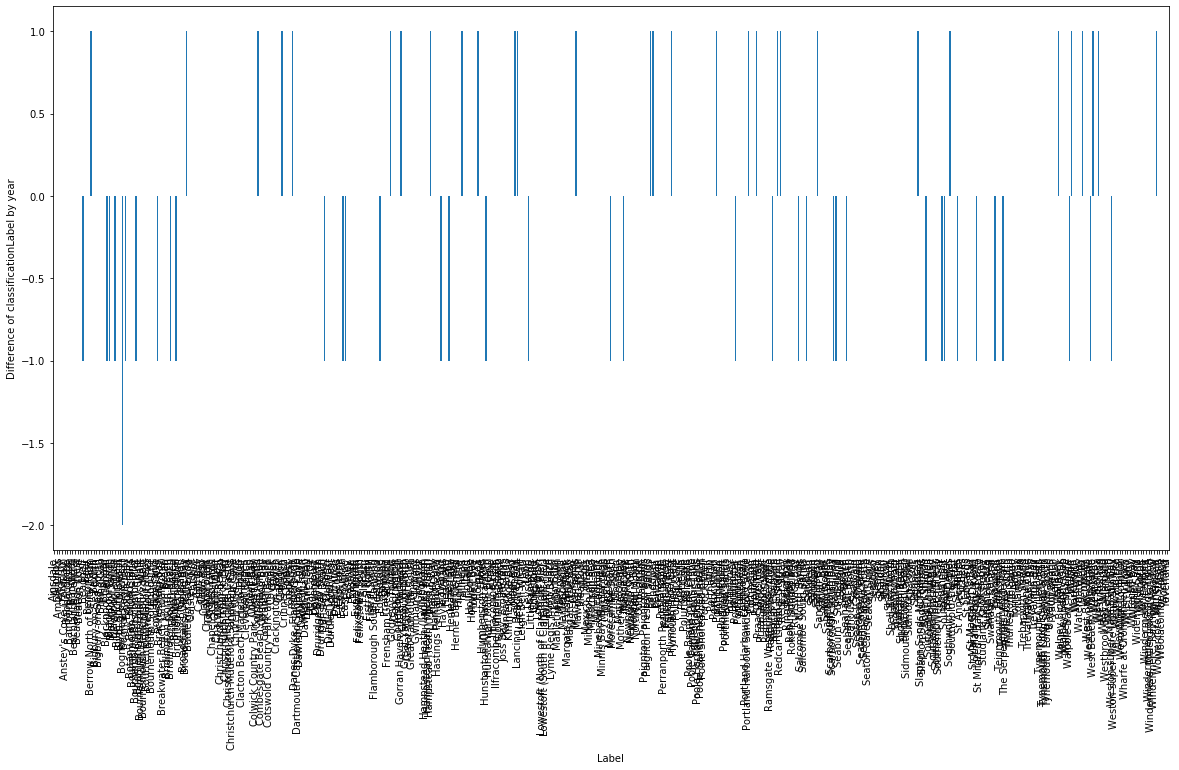

In [7]:
label_diff_year = df.groupby(['label', 'year'])['classificationLabel'].mean().unstack()
label_diff_year = label_diff_year[2022] - label_diff_year[2021]
label_diff_year.plot(kind='bar', figsize=(20,10))
plt.xlabel('Label')
plt.ylabel('Difference of classificationLabel by year')
plt.show()

In [8]:
label_diff_year = df.groupby(['label', 'year'])['classificationLabel'].mean().unstack()
increased_labels = label_diff_year[label_diff_year[2022] > label_diff_year[2021]].index
increased_labels

Index(['Berrow North of Unity Farm', 'Broadstairs, Viking Bay', 'Combe Martin',
       'Crimdon', 'Croyde Bay', 'Frinton', 'Gorran Haven Little Perhaver',
       'Hampstead Heath (Mixed Pond)', 'Hillhead', 'Hornsea', 'Ladram Bay',
       'Lancing, Beach Green', 'Marske Sands', 'Par Sands', 'Pendower',
       'Plymouth Hoe East', 'Porthcurnick',
       'Portland Harbour Sandsfoot Castle', 'Portwrinkle', 'Redcar Granville',
       'Redcar Lifeboat Station', 'Sandsend', 'Skipsea', 'Southwold The Denes',
       'Wallasey', 'Walton', 'Wells', 'West Beach, Whitstable', 'West Mersea',
       'Withernsea'],
      dtype='object', name='label')

In [9]:
label_diff_year = df.groupby(['label', 'year'])['classificationLabel'].mean().unstack()
const_labels = label_diff_year[label_diff_year[2022] == label_diff_year[2021]].index
const_labels

Index(['Ainsdale', 'Allonby', 'Amble Links', 'Anderby',
       'Anstey's Cove (Torquay)', 'Babbacombe', 'Bamburgh Castle', 'Bantham',
       'Beachlands Central', 'Beachlands West',
       ...
       'Widemouth Sand', 'Wilsthorpe', 'Winchelsea', 'Windermere, Fellfoot',
       'Windermere, Lakeside YMCA', 'Windermere, Millerground Landing',
       'Windermere, Rayrigg Meadow', 'Woolacombe Village', 'Worthing',
       'Yaverland'],
      dtype='object', name='label', length=350)

In [10]:
label_diff_year = df.groupby(['label', 'year'])['classificationLabel'].mean().unstack()
decreased_labels = label_diff_year[label_diff_year[2022] == label_diff_year[2021]].index
decreased_labels

Index(['Ainsdale', 'Allonby', 'Amble Links', 'Anderby',
       'Anstey's Cove (Torquay)', 'Babbacombe', 'Bamburgh Castle', 'Bantham',
       'Beachlands Central', 'Beachlands West',
       ...
       'Widemouth Sand', 'Wilsthorpe', 'Winchelsea', 'Windermere, Fellfoot',
       'Windermere, Lakeside YMCA', 'Windermere, Millerground Landing',
       'Windermere, Rayrigg Meadow', 'Woolacombe Village', 'Worthing',
       'Yaverland'],
      dtype='object', name='label', length=350)